# Student Sample 2

## 石晴方

## Assignment V: Text Vectorization

## Question 1

Use `nltk.corpus.inaugural` as the corpus data for this exercise. It is a collection of US presidential inaugural speeches over the years. Cluster all the inaugural speeches collected in the corpus based on their bag-of-words vectorized representations.

Please consider the following settings for bag-of-words model:
- Use the English stopwords provided in `nltk.corpus.stopwords.words('english')` to remove uninformative words.
- Lemmatize word tokens using `WordNetLemmatizer()`.
- Normalize the letter casing.
- Include in the Bag-of-words model only words consisting as alphabets or hyphens.
- Use `TfIdfVectorizer()` for bag-of-word vectorization.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import inaugural
import matplotlib
import matplotlib.pyplot as plt

## Default Style Settings
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200

In [ ]:
labels = inaugural.fileids() # all speakers

corpus = []
for i in labels:
    speech = inaugural.words(i) # all speeches
    corpus.append(speech)

In [ ]:
## pos-tagging ##
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parse','entity'])

corp_sents_pos = []  # each element is a sentence
for sent in corpus:
    sent = ' '.join(sent)
    text_tagged = nlp(sent)
    
    tagged_sent = []
    for word in text_tagged:
        word_pos = f"{word.text}/{word.pos_}"
        tagged_sent.append(word_pos)
    tagged_sent = ' '.join(tagged_sent)

    corp_sents_pos.append(tagged_sent)

In [ ]:
## prepare for lemmatizing ##
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
## get lemmatized version ##
corp_tagged_sent = [] # new tagged sentences
for sent in corpus:
    sentence = ' '.join(sent)
    tokens = word_tokenize(sentence)
    tagged_sent = pos_tag(tokens)
    corp_tagged_sent.append(tagged_sent)
    
wnl = WordNetLemmatizer()
corp_lem = []
for sent in corp_tagged_sent: # each element is a sentence
    
    sent_lem = [] 
    for tag in sent:
        wordnet_pos = get_pos(tag[1]) or wordnet.NOUN
        lem = wnl.lemmatize(tag[0], pos=wordnet_pos)
        sent_lem.append(lem)
    sent_lem = ' '.join(sent_lem)
    
    corp_lem.append(sent_lem)

In [ ]:
cleaned_corp_lem = []
for sent in corp_lem:
  # remove words that are not composed by alphabets or hyphens
  sentence = re.sub(r'[^a-zA-Z- ]', '', sent)
  cleaned_corp_lem.append(sentence)

cleaned_corp_lem = np.array(cleaned_corp_lem) # np.array better than list

In [ ]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(cleaned_corp_lem)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.,
                     max_df=1.,
                     norm='l2',
                     use_idf=True,
                     smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
speakers = [re.sub(r'.txt', '', label) for label in labels]
tfidf_df.index = speakers

In [ ]:
tfidf_df

,abandon,abandonment,abate,abdicate,abeyance,abhorring,abide,abiding,ability,abject,able,ably,abnormal,abode,abolish,aboriginal,aborigine,abound,abraham,abreast,abridge,abroad,absence,absent,absolute,absolutely,absolutism,absorb,abstain,abstract,abstraction,absurd,abundance,abundant,abundantly,abuse,academy,accept,acceptance,access,...,wright,wring,writ,write,writer,writing,wrong,wrongdoing,wrongfully,wrought,xa,xand,xideals,xin,xon,xpreparing,xprone,xtested,xthe,xthey,xthough,xviolence,xwe,year,yearn,yearning,yes,yesterday,yet,yield,yielding,york,yorktown,young,youth,youthful,zeal,zealous,zealously,zone
1789-Washington,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1793-Washington,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1797-Adams,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
1801-Jefferson,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
1805-Jefferson,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00
1809-Madison,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00
1813-Madison,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1817-Monroe,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.02,0.00,0.03
1821-Monroe,0.03,0.00,0.00,0.00,0.00,0.00,0.0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)

similarity_df.columns = speakers
similarity_df.index = speakers

In [ ]:
similarity_df

,1789-Washington,1793-Washington,1797-Adams,1801-Jefferson,1805-Jefferson,1809-Madison,1813-Madison,1817-Monroe,1821-Monroe,1825-Adams,1829-Jackson,1833-Jackson,1837-VanBuren,1841-Harrison,1845-Polk,1849-Taylor,1853-Pierce,1857-Buchanan,1861-Lincoln,1865-Lincoln,1869-Grant,1873-Grant,1877-Hayes,1881-Garfield,1885-Cleveland,1889-Harrison,1893-Cleveland,1897-McKinley,1901-McKinley,1905-Roosevelt,1909-Taft,1913-Wilson,1917-Wilson,1921-Harding,1925-Coolidge,1929-Hoover,1933-Roosevelt,1937-Roosevelt,1941-Roosevelt,1945-Roosevelt,1949-Truman,1953-Eisenhower,1957-Eisenhower,1961-Kennedy,1965-Johnson,1969-Nixon,1973-Nixon,1977-Carter,1981-Reagan,1985-Reagan,1989-Bush,1993-Clinton,1997-Clinton,2001-Bush,2005-Bush,2009-Obama,2013-Obama,2017-Trump
1789-Washington,1.000000,0.128654,0.266728,0.237699,0.240001,0.223123,0.172139,0.305076,0.274155,0.261541,0.245987,0.240461,0.287995,0.310789,0.279560,0.235632,0.253957,0.268670,0.237005,0.111101,0.180719,0.179685,0.273862,0.214090,0.247776,0.224471,0.211448,0.235026,0.209201,0.127090,0.210848,0.158028,0.156958,0.175448,0.218525,0.191762,0.158817,0.164111,0.139371,0.086741,0.143598,0.158861,0.127832,0.143010,0.133008,0.127627,0.139281,0.123123,0.145090,0.164323,0.140619,0.114901,0.149352,0.149586,0.160793,0.157796,0.154621,0.121949
1793-Washington,0.128654,1.000000,0.127477,0.113206,0.120962,0.065459,0.082662,0.112316,0.114646,0.091803,0.119478,0.108602,0.130877,0.146570,0.125876,0.180731,0.122165,0.157827,0.166361,0.052383,0.097930,0.083664,0.115374,0.140034,0.166643,0.143743,0.101721,0.128786,0.102683,0.039482,0.107356,0.057680,0.074735,0.093592,0.090277,0.098005,0.072582,0.083915,0.065056,0.096428,0.058523,0.085392,0.075244,0.075071,0.046899,0.080422,0.077667,0.063993,0.082496,0.062501,0.049338,0.079686,0.056293,0.074069,0.102904,0.058679,0.089154,0.088356
1797-Adams,0.266728,0.127477,1.000000,0.281854,0.273562,0.275352,0.186170,0.374091,0.328411,0.365891,0.290487,0.300262,0.345914,0.399401,0.347910,0.270007,0.291442,0.358189,0.287312,0.118370,0.210442,0.222539,0.329213,0.326740,0.305989,0.320417,0.247111,0.322908,0.278484,0.200328,0.240383,0.193902,0.231449,0.227495,0.305904,0.285970,0.196262,0.238226,0.241902,0.120309,0.229614,0.218998,0.225892,0.161242,0.173360,0.180107,0.193015,0.182853,0.193940,0.206476,0.181647,0.175983,0.210963,0.189106,0.226965,0.206024,0.204704,0.190068
1801-Jefferson,0.237699,0.113206,0.281854,1.000000,0.315944,0.255355,0.165704,0.306146,0.273181,0.315220,0.240161,0.273690,0.310258,0.347190,0.328688,0.246257,0.300198,0.293846,0.279508,0.135622,0.190090,0.216112,0.270911,0.283441,0.261950,0.244407,0.232915,0.251487,0.233983,0.173062,0.209769,0.198519,0.217202,0.216660,0.282689,0.237107,0.176351,0.205976,0.184403,0.140419,0.206338,0.234623,0.218414,0.219832,0.205450,0.230191,0.206103,0.169398,0.213943,0.229865,0.207833,0.154997,0.209347,0.189925,0.205814,0.219831,0.208855,0.143859
1805-Jefferson,0.240001,0.120962,0.273562,0.315944,1.000000,0.252734,0.175230,0.334379,0.330579,0.314025,0.283166,0.237538,0.321801,0.348342,0.365327,0.242444,0.283912,0.308590,0.251446,0.146297,0.233705,0.213091,0.274442,0.264561,0.280534,0.294549,0.227589,0.272254,0.228575,0.169899,0.240699,0.160567,0.203368,0.198814,0.270733,0.229612,0.196428,0.204656,0.157836,0.119623,0.186090,0.198245,0.188089,0.168885,0.181228,0.155753,0.155811,0.162922,0.177995,0.176981,0.174727,0.133265,0.149693,0.184568,0.185542,0.184235,0.191005,0.111741
1809-Madison,0.223123,0.065459,0.275352,0.255355,0.252734,1.000000,0.201511,0.308384,0.275039,0.295895,0.264014,0.200660,0.284981,0.270550,0.267717,0.207415,0.269741,0.232657,0.201004,0.105503,0.177568,0.180926,0.245255,0.232352,0.198775,0.246024,0.178797,0.239121,0.198520,0.133133,0.184448,0.133972,0.196787,0.171371,0.233847,0.195186,0.156525,0.152092,0.129290,0.098776,0.183643,0.171643,0.165700,0.114415,0.143498,0.117638,0.138462,0.142521,0.126685,0.147560,0.122841,0.106078,0.127126,0.144057,0.157781,0.140480,0.143564,0.114001
1813-Madison,0.172139,0.082662,0.18

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')

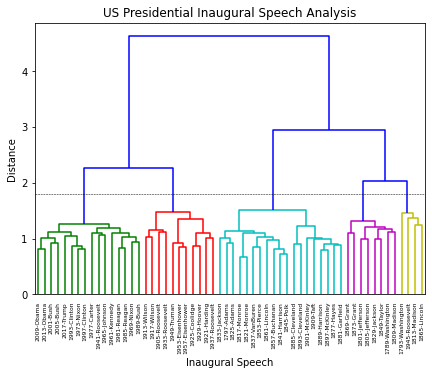

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('US Presidential Inaugural Speech Analysis')
plt.xlabel('Inaugural Speech')
plt.ylabel('Distance')
color_threshold = 1.8
dendrogram(Z, color_threshold = color_threshold, labels = speakers)
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)

## Question 2

Please use the Chinese song lyrics from the directory, `demo_data/ChineseSongLyrics`, as the corpus for this exercise. The directory is a collection of song lyrics from nine Chinese pop-song artists.

Please utilize the bag-of-words method to vectorize each artist's song lyrics and provide a cluster analysis of each artist in terms of their textual similarities in lyrics.

A few notes for data processing:
- Please use `ckip-transformers` for word segmentation and POS tagging.
- Please build the bag-of-words model using the `Tfidfvectorizer()`.
- Please include in the model only words (a) whose POS tags start with 'N' or 'V', and (b) which consist of NO digits, alphabets, symbols and punctuations.
- Please make sure you have the word tokens intact when doing the vectorization using `Tfidfvectorizer()`.

The expected result is a dendrogram as shown below. But please note that depending on how you preprocess the data and adjust the parameters of bag-of-words representations, we may have somewhat different results. Please indicate and justify your parameter settings in the bag-of-words model creation (i.e., using markdown cells in notebook).

In [ ]:
def remove_special_characters(text):
    pattern = r'[^\w\s]'
    eng_dig = r'[A-Za-z0-9]'
    text = re.sub(pattern, '', text) # remove special characters
    text = re.sub(eng_dig, '', text) # remove alphabets & digits
    return text

In [ ]:
## load data ##
singers = ["周杰倫", "周興哲", "張惠妹", "林俊傑", "田馥甄", "蔡依林", "鄧紫棋", "陳奕迅", "高爾宣"]

lyrics_corpus = []
for singer in singers:
  with open(f'{singer}.txt', 'r', encoding='utf-8') as f:
    lyrics = re.sub('\n', ' ', f.read()).replace(u'\u3000', u' ') # remove \n and fullwidth spaces
    lyrics = remove_special_characters(lyrics)
  lyrics_corpus.append(lyrics)

In [ ]:
import ckip_transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

In [ ]:
# %%time
# ws_driver = CkipWordSegmenter(level=3, device=-1)
# pos_driver = CkipPosTagger(level=3, device=-1)

In [ ]:
text = [p for p in lyrics_corpus if len(p) != 0]
# ws = ws_driver(text, use_delim=True)
# pos = pos_driver(ws, use_delim=False)
import pickle
with open('ws.pkl', 'rb') as f:
  ws = pickle.load(f)
with open('pos.pkl', 'rb') as f:
  pos = pickle.load(f)

In [ ]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
    assert len(sentence_ws) == len(sentence_pos)
    res = []
    for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      # remove japanese character and zhuyin
      jp_zhuyin = u'[\u3040-\u309f\u3105-\u3129\u02CA\u02C7\u02CB\u02D9]+'
      word_ws = re.sub(jp_zhuyin, '', word_ws)
      if re.match(r'V.+|N.+', word_pos): # only include words whose POS tags start with 'N' or 'V'
        res.append(word_ws)
    return ' '.join(res)

In [ ]:
norm_lyrics = []
for sentence_ws, sentence_pos in zip(ws, pos):
  norm_lyrics.append(pack_ws_pos_sentece(sentence_ws, sentence_pos))

In [ ]:
tv_matrix = tv.fit_transform(norm_lyrics)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
tv_df = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
tv_df.index = singers

In [ ]:
tv_df

,__,一丁目,一丁點,一下,一下子,一世,一串串,一九九五年,一九四三,一九幾幾,一二三,一二三四,一些,一些些,一個個,一個樣,一兩,一刀兩斷,一切,一剎,一剎不,一剎曾,一剎眼,一剎花火,一剎那,一千,一千三十四,一千零一,一千零一世,一半,一句句,一吋吋,一噸噸,一堆堆,一塊,一塵不染,一天到晚,一天天,一如,一字,...,點著,點解,點起,點錯,點頭,點點,點點滴滴,點點頭,點點點,黯淡,黯然,黯然神傷,鼓勵,鼓掌,鼓聲,鼓舞,鼓號,鼓譟,鼓起,鼓點,鼻子,鼻孔,鼻尖,鼻屎,鼻涕,鼻環,鼻舌口,齊集,齒縫,齒輪,龍山寺,龍形,龍拳,龍捲風,龐大,龜毛,龜苓膏,了解,輪迴,１０１
周杰倫,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.01,0.0,0.00,0.02,0.01,0.01,0.0,0.00,0.0,0.0,0.06,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.01,0.0,0.02,0.01,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.01,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.00,0.0,0.0
周興哲,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.01,0.00,0.0,0.00,0.0,0.0,0.07,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.0,...,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.03,0.0,0.0
張惠妹,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.02,0.00,0.0,0.00,0.0,0.0,0.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.02,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
林俊傑,0.0,0.0,0.00,0.02,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.04,0.00,0.0,0.00,0.0,0.0,0.12,0.00,0.00,0.0,0.00,0.00,0.01,0.05,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
田馥甄,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.01,0.00,0.02,0.00,0.0,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.0,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
蔡依林,0.0,0.0,0.00,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.02,0.00,0.0,0.00,0.0,0.0,0.06,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.0,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.0
鄧紫棋,0.0,0.0,0.00,0.01,0.02,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.0,0.0,0.04,0.01,0.02,0.0,0.00,0.01,0.00,0.01,0.0,0.02,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.06,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.02,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.00,0.0,0.0
陳奕迅,0.0,0.0,0.01,0.03,0.00,0.01,0.0,0.0,0.00,0.0,0.00,0.00,0.03,0.00,0.0,0.00,0.0,0.0,0.11,0.02,0.00,0.0,0.01,0.00,0.01,0.02,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.02,0.0,0.0,...,0.0,0.01,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.01,0.00,0.01,0.00,0.0,0.01,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.01,0.00,0.0,0.00,0.0,0.0
高爾宣,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,0.02,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0


In [ ]:
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)

similarity_df.columns = singers
similarity_df.index = singers

In [ ]:
similarity_df

,周杰倫,周興哲,張惠妹,林俊傑,田馥甄,蔡依林,鄧紫棋,陳奕迅,高爾宣
周杰倫,1.000000,0.522283,0.583760,0.610308,0.477295,0.545189,0.478888,0.551717,0.316800
周興哲,0.522283,1.000000,0.596287,0.646241,0.490441,0.526689,0.481288,0.545722,0.291691
張惠妹,0.583760,0.596287,1.000000,0.664320,0.627984,0.654234,0.520167,0.633740,0.319379
林俊傑,0.610308,0.646241,0.664320,1.000000,0.548528,0.598900,0.550749,0.625269,0.358418
田馥甄,0.477295,0.490441,0.627984,0.548528,1.000000,0.566990,0.438531,0.529108,0.269190
蔡依林,0.545189,0.526689,0.654234,0.598900,0.566990,1.000000,0.466455,0.568840,0.293190
鄧紫棋,0.478888,0.481288,0.520167,0.550749,0.438531,0.466455,1.000000,0.521779,0.282142
陳奕迅,0.551717,0.545722,0.633740,0.625269,0.529108,0.568840,0.521779,1.000000,0.327316
高爾宣,0.316800,0.291691,0.319379,0.358418,0.269190,0.293190,0.282142,0.327316,1.000000


In [ ]:
# 下載中文字體
# !wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為台北思源黑體
matplotlib.rc('font', family = 'Taipei Sans TC Beta')

In [ ]:
Z = linkage(similarity_matrix, 'ward')

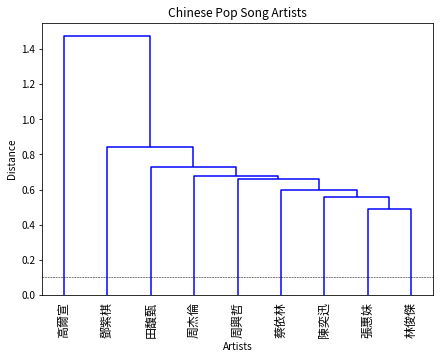

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Chinese Pop Song Artists')
plt.xlabel('Artists')
plt.ylabel('Distance')
color_threshold = 0.1
dendrogram(Z, labels = singers, leaf_rotation = 90, color_threshold = color_threshold, above_threshold_color='b')
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)